<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Companion_Wave_Communication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install matplotlib numpy

In [61]:
import numpy as np
import matplotlib.pyplot as plt

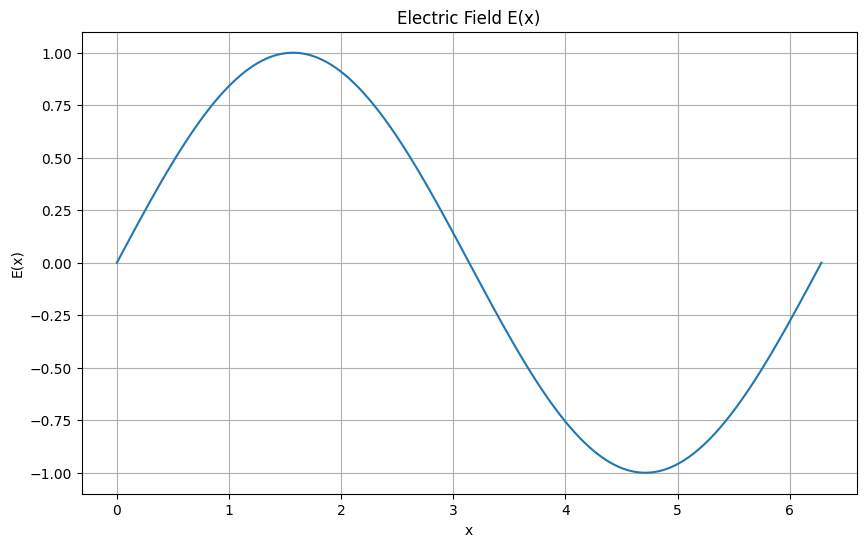

In [62]:
x = np.linspace(0, 2*np.pi, 1000)
E_0 = 1
k = 1

E = E_0 * np.sin(k * x)

plt.figure(figsize=(10, 6))
plt.plot(x, E)
plt.title('Electric Field E(x)')
plt.xlabel('x')
plt.ylabel('E(x)')
plt.grid(True)
plt.show()

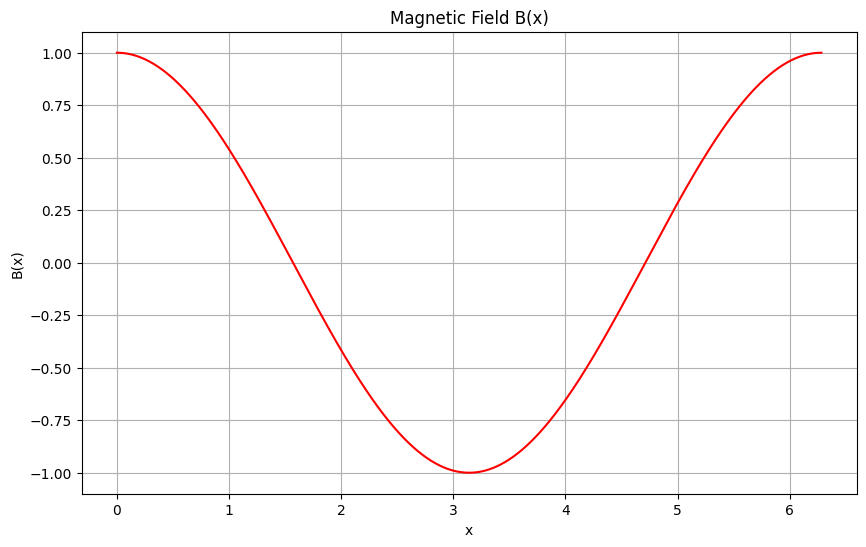

In [63]:
B_0 = 1

B = B_0 * np.sin(k * x + np.pi/2)

plt.figure(figsize=(10, 6))
plt.plot(x, B, color='red')
plt.title('Magnetic Field B(x)')
plt.xlabel('x')
plt.ylabel('B(x)')
plt.grid(True)
plt.show()

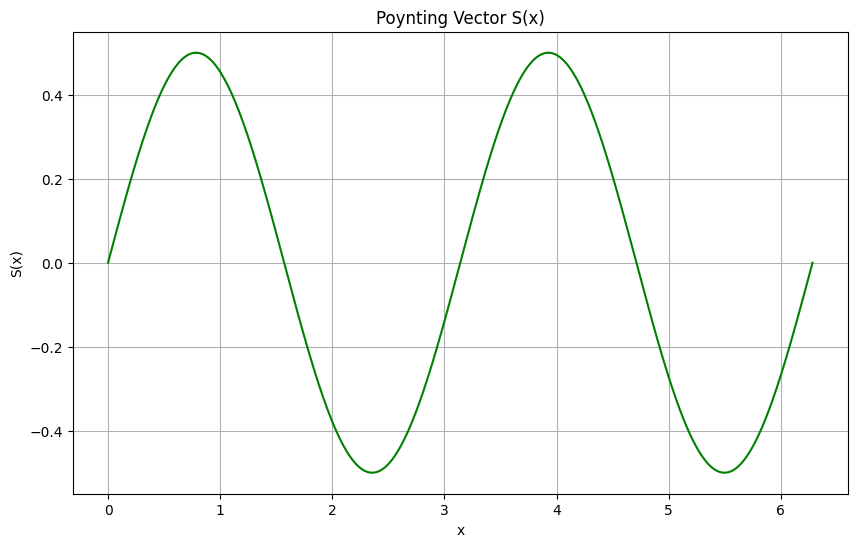

In [64]:
S = E * B

plt.figure(figsize=(10, 6))
plt.plot(x, S, color='green')
plt.title('Poynting Vector S(x)')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.grid(True)
plt.show()

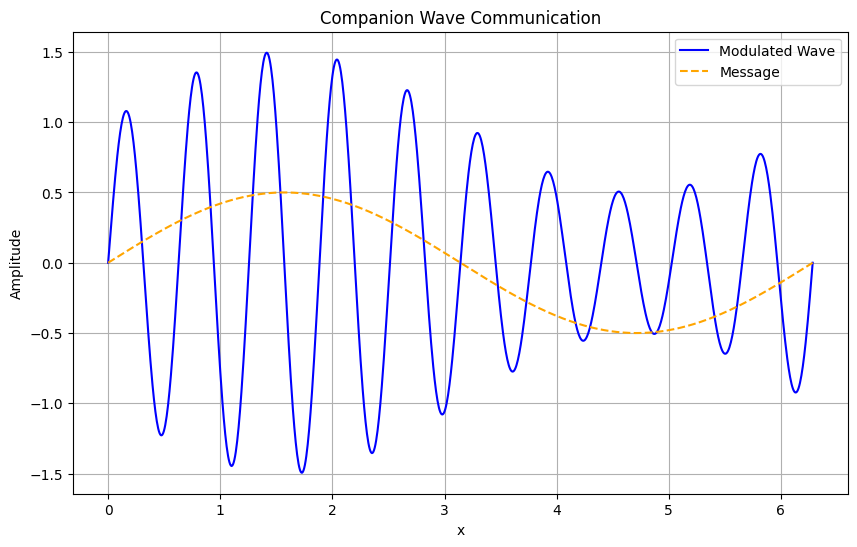

In [65]:
carrier = np.sin(10 * k * x)
message = 0.5 * np.sin(k * x)
modulated_wave = (1 + message) * carrier

plt.figure(figsize=(10, 6))
plt.plot(x, modulated_wave, color='blue', label='Modulated Wave')
plt.plot(x, message, color='orange', linestyle='dashed', label='Message')
plt.title('Companion Wave Communication')
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
def electric_field_amplitude(E0, o, k, y):
    return E0 * np.sin(o * t - k * y)

def magnetic_field_amplitude(bo, o, k, r):
    return bo * np.sin(o * t - k * r)


In [67]:
def poynting_vector(E, B, po):
    return np.cross(E, B) / po


In [68]:
def force_from_maxwell(E, B, po, E0, bo):
    Jd = np.cross(np.gradient(B), B)
    Fd = Jd * B
    F0 = E0 * B
    return po * Fd + po * E0 * np.cross(Jd, B)


In [69]:
def force_on_FMA(A, L, c, b, po, U):
    return A * L * c * b**2 + A * L * po * U * b


In [70]:
def additional_flow_term(c, po, ABo, bo, v, t, o, k, x):
    return (c/po) * ABo * bo * np.sin(v * t) * np.sin(o * t - k * x)


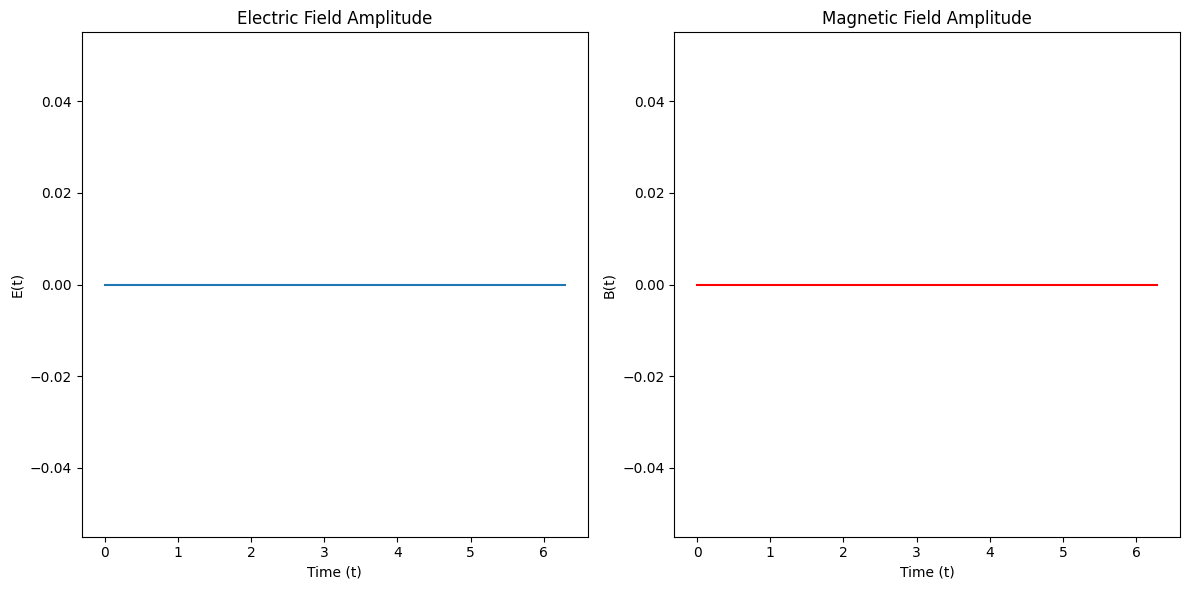

In [71]:
t = np.linspace(0, 2*np.pi, 1000)
y = r = t
E0, bo, o, k = 1, 1, 1, 1

E = electric_field_amplitude(E0, o, k, y)
B = magnetic_field_amplitude(bo, o, k, r)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, E)
plt.title('Electric Field Amplitude')
plt.xlabel('Time (t)')
plt.ylabel('E(t)')

plt.subplot(1, 2, 2)
plt.plot(t, B, color='red')
plt.title('Magnetic Field Amplitude')
plt.xlabel('Time (t)')
plt.ylabel('B(t)')

plt.tight_layout()
plt.show()


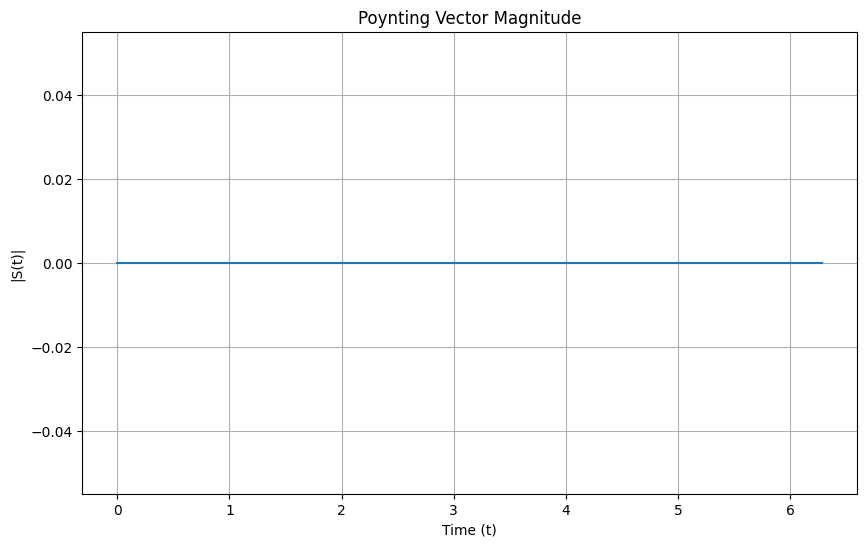

In [72]:
Ez = electric_field_amplitude(E0, o, k, y)
Bz = magnetic_field_amplitude(bo, o, k, r)

# Make these 1D arrays into 3D arrays. The electric field E is in the z-direction.
E_3D = np.array([np.zeros_like(Ez), np.zeros_like(Ez), Ez]).T
B_3D = np.array([np.zeros_like(Bz), np.zeros_like(Bz), Bz]).T

S_3D = poynting_vector(E_3D, B_3D, po)
S_magnitude = np.linalg.norm(S_3D, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(t, S_magnitude)
plt.title('Poynting Vector Magnitude')
plt.xlabel('Time (t)')
plt.ylabel('|S(t)|')
plt.grid(True)
plt.show()


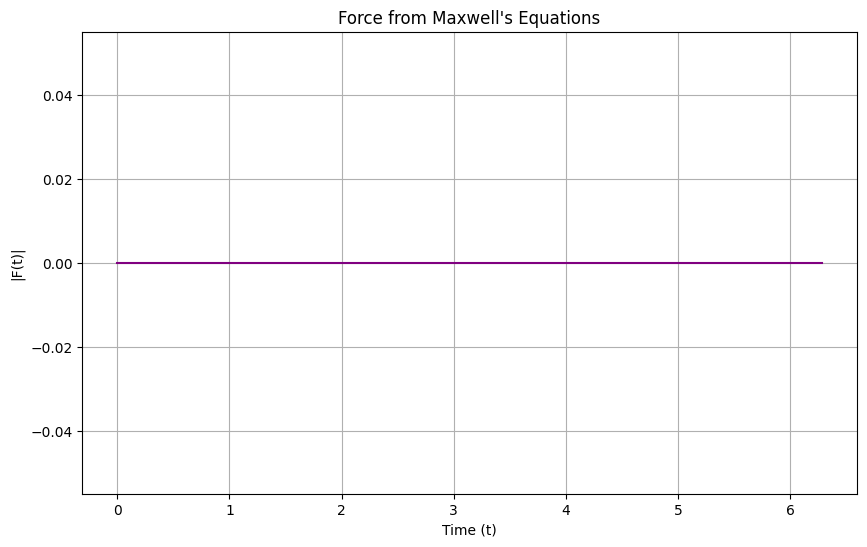

In [73]:
def force_from_maxwell(E, B, po, E0, bo):
    Jd = np.cross(np.gradient(B, axis=0), B)
    Fd = Jd * B
    F0 = E0 * B
    return po * Fd + po * E0 * np.cross(Jd, B)

F_3D = force_from_maxwell(E_3D, B_3D, po, E0, bo)
F_magnitude = np.linalg.norm(F_3D, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(t, F_magnitude, color='purple')
plt.title('Force from Maxwell\'s Equations')
plt.xlabel('Time (t)')
plt.ylabel('|F(t)|')
plt.grid(True)
plt.show()


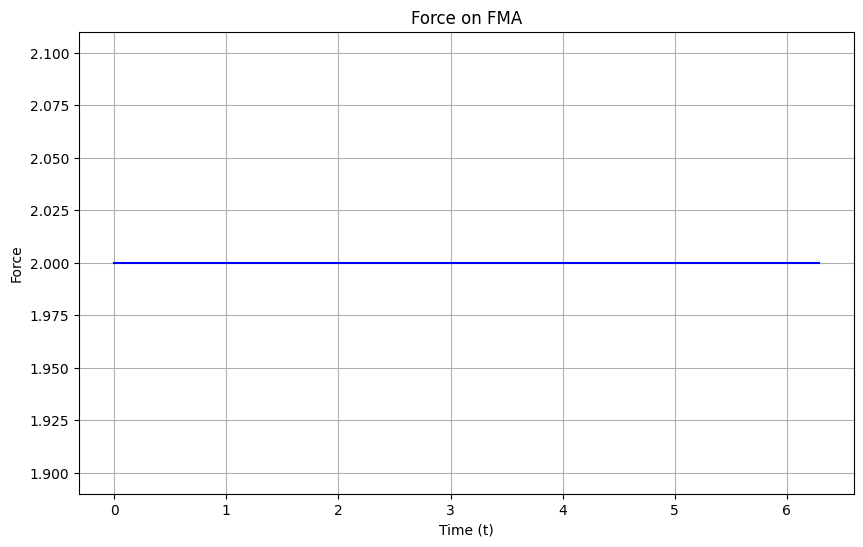

In [74]:
A, L, c, b, U = 1, 1, 1, 1, 1
F_FMA = force_on_FMA(A, L, c, b, po, U)

F_FMA_array = np.full(t.shape, F_FMA)

plt.figure(figsize=(10, 6))
plt.plot(t, F_FMA_array, color='blue')
plt.title('Force on FMA')
plt.xlabel('Time (t)')
plt.ylabel('Force')
plt.grid(True)
plt.show()


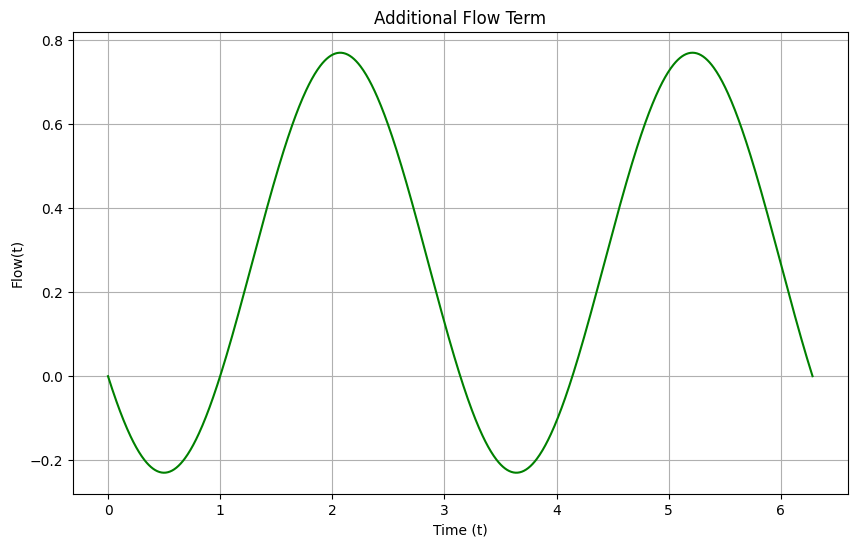

In [75]:
ABo, v, x = 1, 1, 1
flow = additional_flow_term(c, po, ABo, bo, v, t, o, k, x)

plt.figure(figsize=(10, 6))
plt.plot(t, flow, color='green')
plt.title('Additional Flow Term')
plt.xlabel('Time (t)')
plt.ylabel('Flow(t)')
plt.grid(True)
plt.show()
